### Topic analysis of PubMedHealth articles (summaries) - 'heart disease' :

In [1]:
from pymongo import MongoClient

In [2]:
client = MongoClient()
collection = client.pubmedhealth.heart
cursor = collection.find()
print cursor.count()

5143


In [3]:
documents = list(cursor)
print documents[:1]

[{u'url': u'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=pubmedhealth&retmode=json&id=86286', u'_id': ObjectId('5702cc7995791a10103a4255'), u'summary': u'Omega-3 (n-3) fatty acids are essential polyunsaturated fatty acids (PUFAs) \\u2013 fatty acid structures with two or more double bonds. Fatty fish, nuts, and seeds are good dietary sources of n-3s. Dietary sources vary in the composition of essential fatty acids. Fatty fish and fish oils provide a rich source of long-chain (LC) n-3s like eicosapentaenoic acid (EPA) and docosahexaenoic acid (DHA), while plant sources are higher in the less therapeutically relevant metabolic precursor alpha-linolenic acid. Various structure-function relationships throughout the body are supported by n-3s. They contribute membrane fluidity through their presence in phospholipid cell membranes and participate in metabolic processes including the provision of cellular energy, optimal neuronal function, and visual acuity. They are also pre

In [4]:
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [5]:
stop = stopwords.words('english')
stemmer = PorterStemmer()
stop_stem_docs = []

for i, doc in enumerate(documents):
    summary = doc['summary'].lower()
    stopped = [word for word in TextBlob(summary).words if word not in stop]
    stemmed = [stemmer.stem(word) for word in stopped]
    stop_stem_docs.append(stemmed)
print stop_stem_docs[:2]

[[u'omega-3', u'n-3', u'fatti', u'acid', u'essenti', u'polyunsatur', u'fatti', u'acid', u'pufa', u'u2013', u'fatti', u'acid', u'structur', u'two', u'doubl', u'bond', u'fatti', u'fish', u'nut', u'seed', u'good', u'dietari', u'sourc', u'n-3', u'dietari', u'sourc', u'vari', u'composit', u'essenti', u'fatti', u'acid', u'fatti', u'fish', u'fish', u'oil', u'provid', u'rich', u'sourc', u'long-chain', u'lc', u'n-3', u'like', u'eicosapentaeno', u'acid', u'epa', u'docosahexaeno', u'acid', u'dha', u'plant', u'sourc', u'higher', u'less', u'therapeut', u'relev', u'metabol', u'precursor', u'alpha-linolen', u'acid', u'variou', u'structure-funct', u'relationship', u'throughout', u'bodi', u'support', u'n-3', u'contribut', u'membran', u'fluiditi', u'presenc', u'phospholipid', u'cell', u'membran', u'particip', u'metabol', u'process', u'includ', u'provis', u'cellular', u'energi', u'optim', u'neuron', u'function', u'visual', u'acuiti', u'also', u'precursor', u'eicosanoid', u'act', u'paracrin', u'hormon', u

In [6]:
print 'Number of processed documents = %d' % len(stop_stem_docs)

Number of processed documents = 5143


In [7]:
from gensim import corpora, models, similarities
import gensim

In [8]:
unique_words = corpora.Dictionary(stop_stem_docs)
print unique_words

Dictionary(12715 unique tokens: [u'nordisk', u'1,778', u'woodi', u'four', u'marfan']...)


In [1]:
#print unique_words.token2id

In [10]:
corpus = [unique_words.doc2bow(doc) for doc in stop_stem_docs]
print len(corpus)

5143


In [21]:
%time ldamodel = models.LdaModel(corpus, num_topics = 5, id2word=unique_words, passes = 100)

CPU times: user 7min 32s, sys: 10.9 s, total: 7min 43s
Wall time: 7min 34s


In [22]:
ldamodel.show_topics()

[(0,
  u'0.017*review + 0.015*evid + 0.014*studi + 0.012*effect + 0.011*intervent + 0.010*outcom + 0.010*health + 0.010*use + 0.008*systemat + 0.008*report'),
 (1,
  u'0.023*review + 0.020*patient + 0.016*heart + 0.015*diseas + 0.014*effect + 0.014*studi + 0.013*conclus + 0.011*risk + 0.011*author + 0.010*conclud'),
 (2,
  u'0.018*studi + 0.018*care + 0.015*review + 0.013*guidelin + 0.013*search + 0.010*identifi + 0.010*health + 0.009*articl + 0.009*includ + 0.008*use'),
 (3,
  u'0.020*diseas + 0.017*blood + 0.011*risk + 0.011*heart + 0.010*caus + 0.009*peopl + 0.008*increas + 0.008*year + 0.007*arteri + 0.006*death'),
 (4,
  u'0.018*cancer + 0.017*treatment + 0.013*patient + 0.010*use + 0.009*atrial + 0.008*depress + 0.007*fibril + 0.007*af + 0.007*risk + 0.006*disord')]

In [23]:
num_top_words = 5 
topics_words = ldamodel.show_topics(num_words=num_top_words)
print type(topics_words)
print len(topics_words)

<type 'list'>
5


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

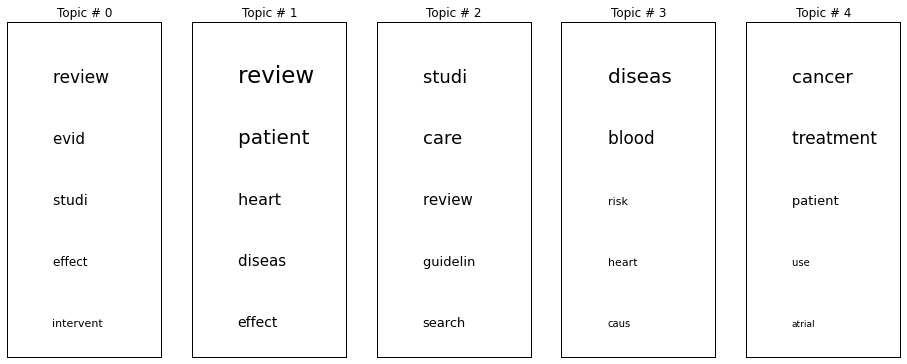

In [28]:
plt.figure(figsize=(16,6))
for topic in topics_words:
    plt.subplot(1,len(topics_words),int(topic[0])+1)
    plt.ylim(0, num_top_words + 0.5)
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Topic # %s' % topic[0])
    #print 'Topic # %s' % topic[0]
    word_prob = topic[1].split("+")
    for _,i in enumerate(word_prob):
        prob,word = i.split("*")
        #print prob + " : " +  word
        plt.text(0.3, num_top_words-_-0.5,word,fontsize=1000 * float(prob))
plt.show()